# Student Performance Analysis

## Section 1: Description

As a senior at the University of Maryland, College Park that is currently studying for mid-terms, the data I am interested in analyzing pertains to attributes of students and their performance on exams. Unfortunately, I was unable to find a data set associated specifically with my university, however, I did in fact find a dataset on Kaggle that analyzed the performance of High school students.

In [5]:
# Reading in data
import pandas as pd
data=pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Number of Rows
print(data.shape[0])
# Column Names
print(data.columns.tolist())
# Data Types
print(data.dtypes)

1000
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


The data set is comprised of 1000 rows and 8 columns, consisting of gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, and writing score. Additionally, the columns possess 2 types of data; objects and integers. I can initially assume that the features for future testing would include gender, race/ethnicity, parental level of education, lunch, and test preparation. All the features are categorical values. The target variables are the scores for math, reading, and writing. All the targets are quantitative values.

## Section 2: Initial Plan for EDA

- Check for any null value
- Find the number of unique values per feature
- Visualize the frequency for each feature
- Determine the mean, median, quantiles, and range for each target
- Plot distributions of test scores
- Compare letter grade frequency to each feature
- Conduct inferential testing
- Summary


## Section 3: Feature Engineering

The feature engineering of this data was creating and applying a function that classified the test scores into letter grades. No manipulation was required for null values because there was none. In a future analysis of this data, in which we can create a prediction model using linear regression or any other applicable ML algorithms, the categorical variables of the data will need to be encoded. 

In [100]:
def letter_grade(score):
    if score >=90:
        return 'A'
    elif score >=80:
        return 'B'
    elif score >=70:
        return 'C'
    elif score >=60:
        return 'D'
    else:
        return 'F'
# Math
data['Math Grade'] = data['math score'].map(letter_grade)
print(data['Math Grade'].value_counts())
# Reading
data['Reading Grade'] = data['reading score'].map(letter_grade)
print(data['Reading Grade'].value_counts())
#Writing
data['Writing Grade'] = data['writing score'].map(letter_grade)
print(data['Writing Grade'].value_counts())

F    323
D    268
C    216
B    135
A     58
Name: Math Grade, dtype: int64
C    264
F    254
D    233
B    170
A     79
Name: Reading Grade, dtype: int64
F    281
C    254
D    230
B    157
A     78
Name: Writing Grade, dtype: int64


### Checking for null value

In [16]:
data[["gender", "race/ethnicity",
     "parental level of education", 
     "lunch", "test preparation course",
      "math score", "reading score", "writing score"]].isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no null values in the data.

## Section 4: Key Findings and Insight

### Find the number of unique values per feature

In [12]:
data[["gender", "race/ethnicity",
     "parental level of education", 
     "lunch", "test preparation course"]].nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

The number of unique values for the features of gender, lunch, and test preparation are 2. Race/ethnicity is 5 and Parental level of education is 6.

### Unique values per categorical column

In [73]:
# Gender
print(list(data['gender'].unique()))
# Race/ethnicity
print(list(data['race/ethnicity'].unique()))
# Parental level of education
print(list(data['parental level of education'].unique()))
# Lunch
print(list(data['lunch'].unique()))
# Test Preparation Course
print(list(data['test preparation course'].unique()))

['female', 'male']
['group B', 'group C', 'group A', 'group D', 'group E']
["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
['standard', 'free/reduced']
['none', 'completed']


- Gender: male and female
- Race/ethnicity: Group's A, B, C, D, or E
- Parental level of Education: some highschool, highschool, some college, associate's degree, bachelor's degree, and master's degree
- Lunch: standard and free/reduced
- Test Preparation Course: none and completed

## Data Visualization

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

### Gender

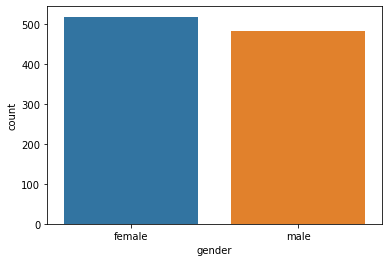

In [50]:
ax = sns.countplot(data.gender)

In [51]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

According to the bar chart, there is more Females(518) then Males(482) in this data.

### Race/ethnicity

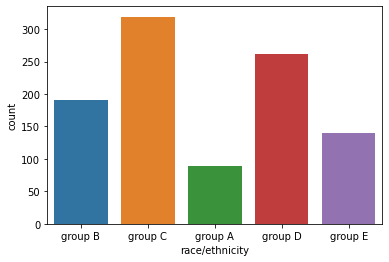

In [36]:
ax = sns.countplot(data["race/ethnicity"])

In [58]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

According to the bar chart, the two largest groups for race/ethnicity within the data are groups C(319) and D(262). Group A(89) is the smallest.

### Parental Level of Education

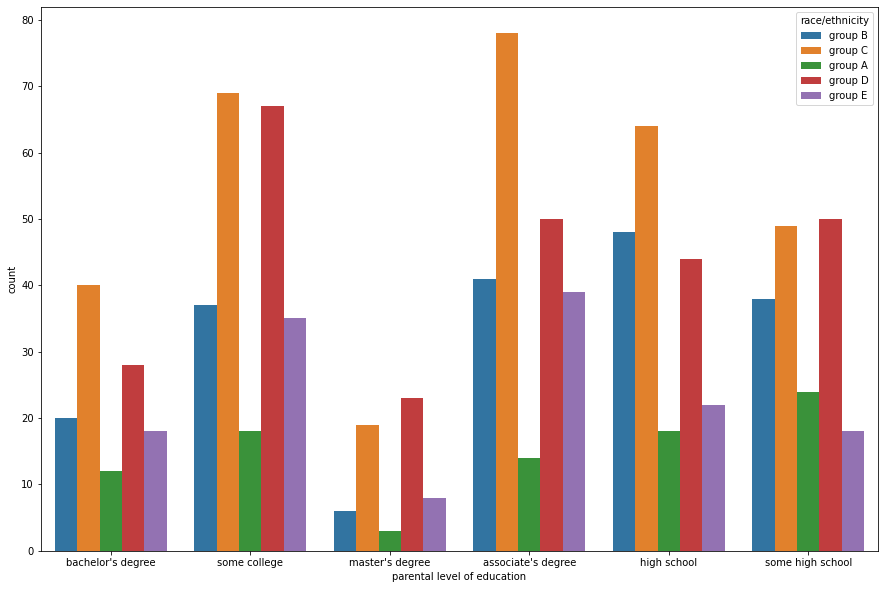

In [222]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
sns.countplot(data["parental level of education"], hue=data['race/ethnicity'])

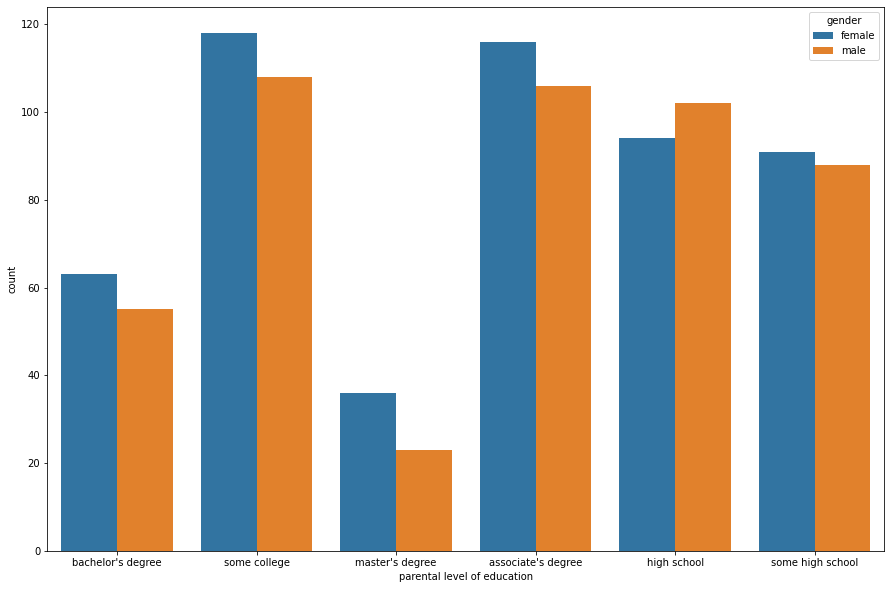

In [84]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
sns.countplot(data["parental level of education"], hue=data['gender'])

In [59]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

According to the bar chart, the two largest groups for parental level of education is some college(226) and assoicate's degree(222). The levels of high school(196) and some high school(179) are significant as well. However, the levels of bachelor's degree(118) and master's degree(59) are much smaller.

### Lunch

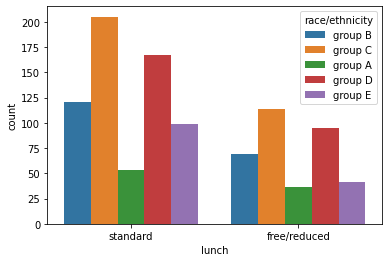

In [81]:
ax = sns.countplot(data.lunch, hue=data['race/ethnicity'])

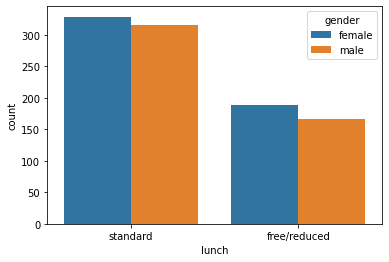

In [85]:
ax = sns.countplot(data.lunch, hue=data['gender'])

In [60]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

For Lunch, most students have standard lunch(645), but there still is a significant population of students with free/reduced lunch(355).

### Test Preparation Course

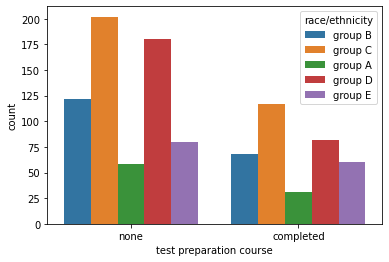

In [82]:
ax = sns.countplot(data["test preparation course"], hue=data['race/ethnicity'])

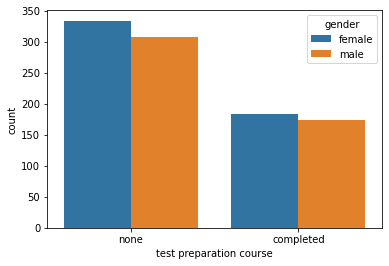

In [83]:
ax = sns.countplot(data["test preparation course"], hue=data['gender'])

In [75]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

For test preparation courses, most students have not taken a course(642).

### Determining the mean, median, quantiles, and range for each test scores

In [18]:
stats_tr = data.describe()
stats_tr.loc['range']= stats_tr.loc['max'] - stats_tr.loc['min']

out_fields = ['mean','25%','50%','75%','range']
stats_tr = stats_tr.loc[out_fields]
stats_tr.rename({'50%':'median'}, inplace=True)
stats_tr

,math score,reading score,writing score
mean,66.089,69.169,68.054
25%,57.000,59.000,57.750
median,66.000,70.000,69.000
75%,77.000,79.000,79.000
range,100.000,83.000,90.000


### Math Scores

(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

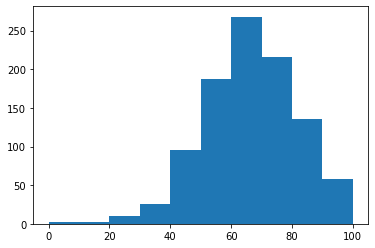

In [76]:
plt.hist(data['math score'], bins=10)

### Reading Scores

(array([  4.,   7.,  22.,  64., 140., 182., 237., 168., 120.,  56.]),
 array([ 17. ,  25.3,  33.6,  41.9,  50.2,  58.5,  66.8,  75.1,  83.4,
         91.7, 100. ]),
 <a list of 10 Patch objects>)

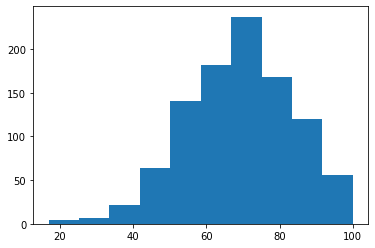

In [62]:
plt.hist(data['reading score'], bins=10)

### Writing Scores

(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

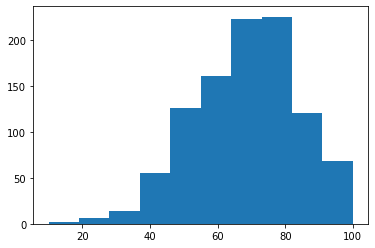

In [63]:
plt.hist(data['writing score'], bins=10)

### Letter Grades vs  Gender

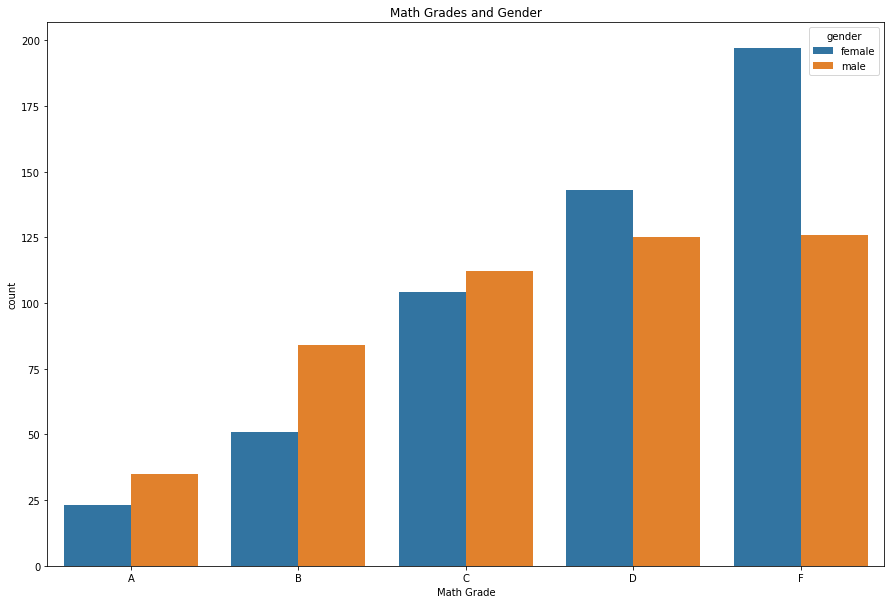

In [164]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Math Grade"], hue=data['gender'],order=['A','B','C','D','F']).set_title('Math Grades and Gender')


In the case of Math grades hued by gender, the distribution between genders is similar. Both Genders are negatively skewed. Additionally, the females have noticeable more Fs than males; however, we must also consider that this is due to the females having a greater population in the data set.

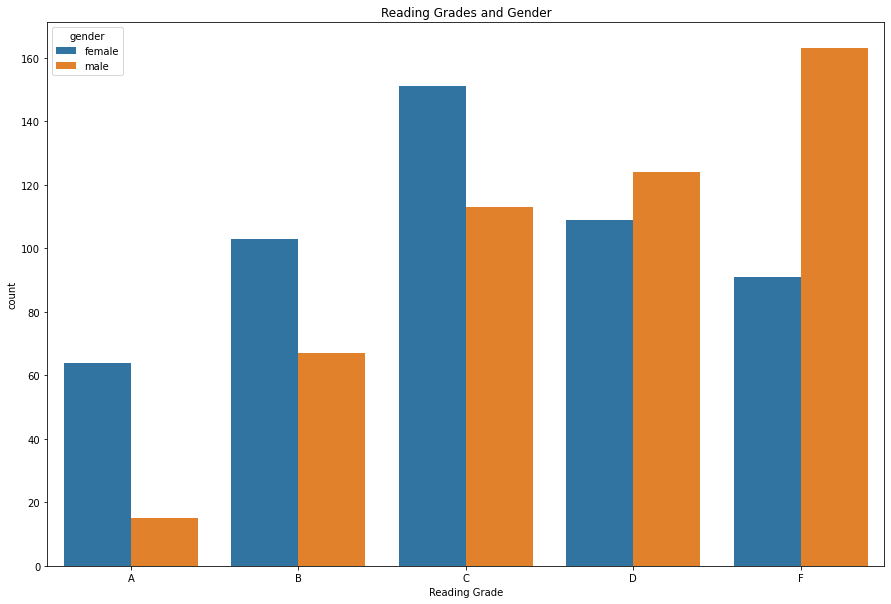

In [165]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Reading Grade"],hue=data['gender'],order=['A','B','C','D','F']).set_title('Reading Grades and Gender')

In the case of reading grades hued by gender, the distribution between genders differs significantly. The distribution of the males is negatively skewed. Additionally, males have significantly more Fs. Females appear to have somewhat of a normal distribution. Thus, Females have a higher mean reading grade.

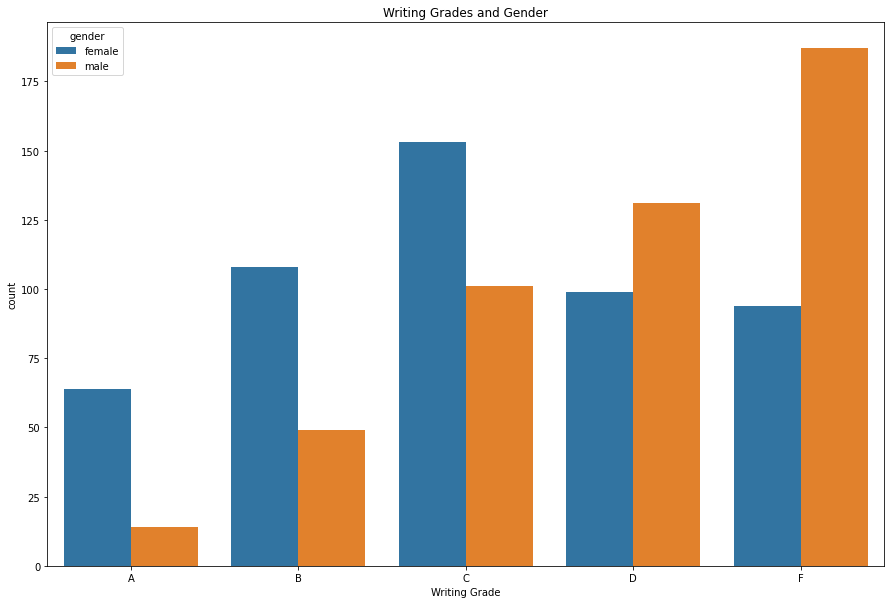

In [166]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Writing Grade"],hue=data['gender'],order=['A','B','C','D','F']).set_title('Writing Grades and Gender')

Similar to the reading grades, in the case of writing grades hued by gender, the distribution between genders differs significantly. The distribution of the males is negatively skewed. Additionally, males have significantly more Fs. Females appear to have somewhat of a normal distribution. Thus, Females have a higher mean writing grade.

### Letter Grades and Race/ethnicity

Text(0.5, 1.0, 'Math Grades and race/ethnicity')

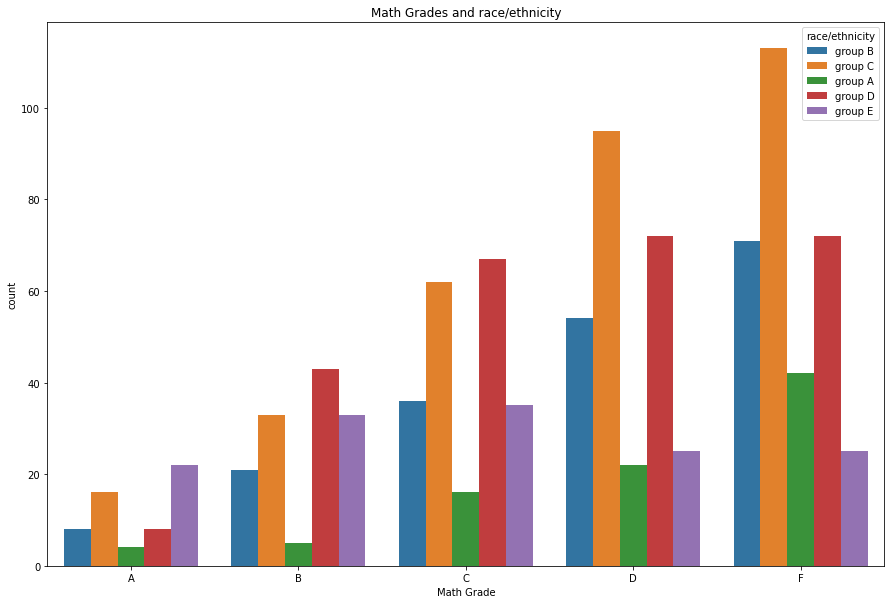

In [167]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Math Grade"], hue=data['race/ethnicity'], order=['A','B','C','D','F'])
ax.set_title('Math Grades and race/ethnicity')

In the case of math grades hued by race/ethnicity, the distributions for Group's A, B, C, and D are negatively skewed. Group E has a somewhat normal distribution. Thus, the mean Math Grade for group E is higher than in other groups.

Text(0.5, 1.0, 'Reading Grades and race/ethnicity')

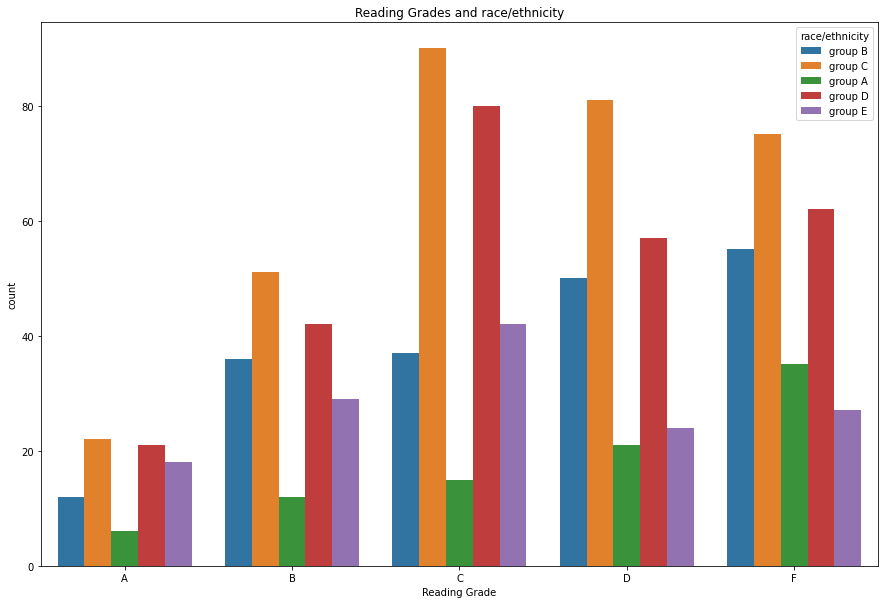

In [168]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Reading Grade"], hue=data['race/ethnicity'],order=['A','B','C','D','F'] )
ax.set_title('Reading Grades and race/ethnicity')

Similar to math grades, in the case of reading hued by race/ethnicity, the distributions for Group's A, B, C, and D are negatively skewed. Although still skewed, Group's C and D appear more normal in comparison to their math grades. Group E has a somewhat normal distribution. Thus, the mean reading grade for group E is higher than in other groups.

Text(0.5, 1.0, 'Writing Grades and race/ethnicity')

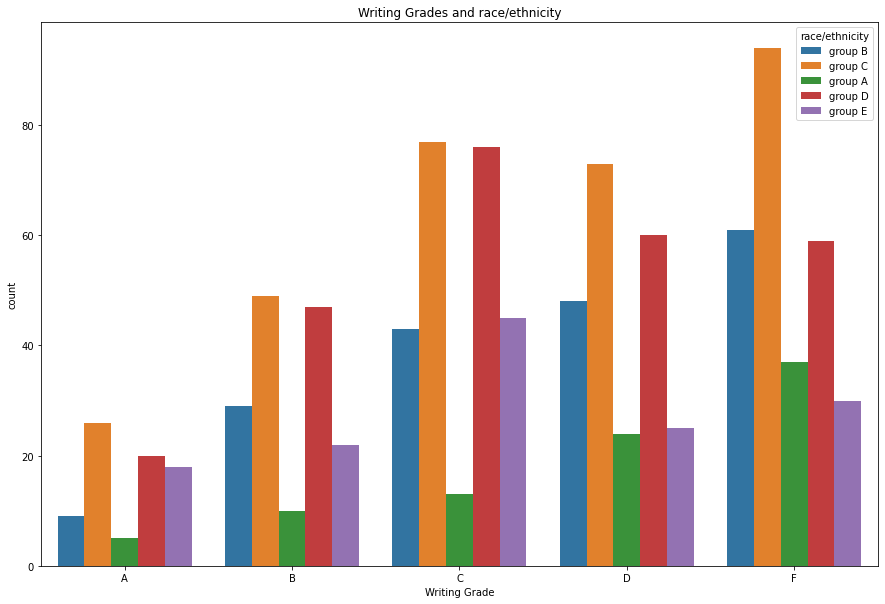

In [170]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Writing Grade"], hue=data['race/ethnicity'], order=['A','B','C','D','F'])
ax.set_title('Writing Grades and race/ethnicity')

In the case of writing grades hued by race/ethnicity, Group's A, B, and are negatively skewed. Group D has a slight negative skew but appears nearly normal. Group E has a somewhat normal distribution. Thus, the mean writing grade for group E is higher than in other groups.

### Letter Grades and Parental level of Education

Text(0.5, 1.0, 'Math Grades and parental level of education')

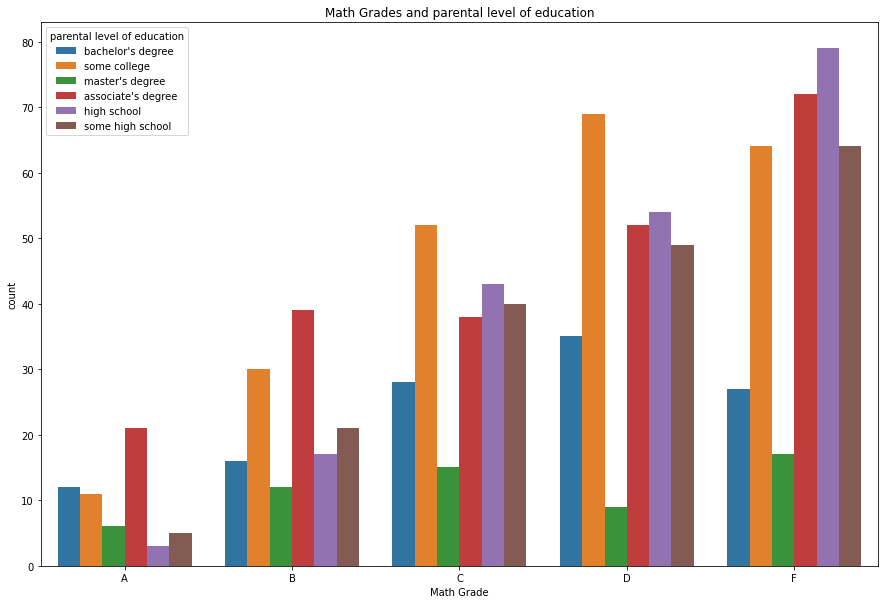

In [171]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Math Grade"], hue=data['parental level of education'], order=['A','B','C','D','F'] )
ax.set_title('Math Grades and parental level of education')

In the case of math grades hued by the parent level of education, all levels of education appear to be negatively skewed.

Text(0.5, 1.0, 'Reading Grades and parental level of education')

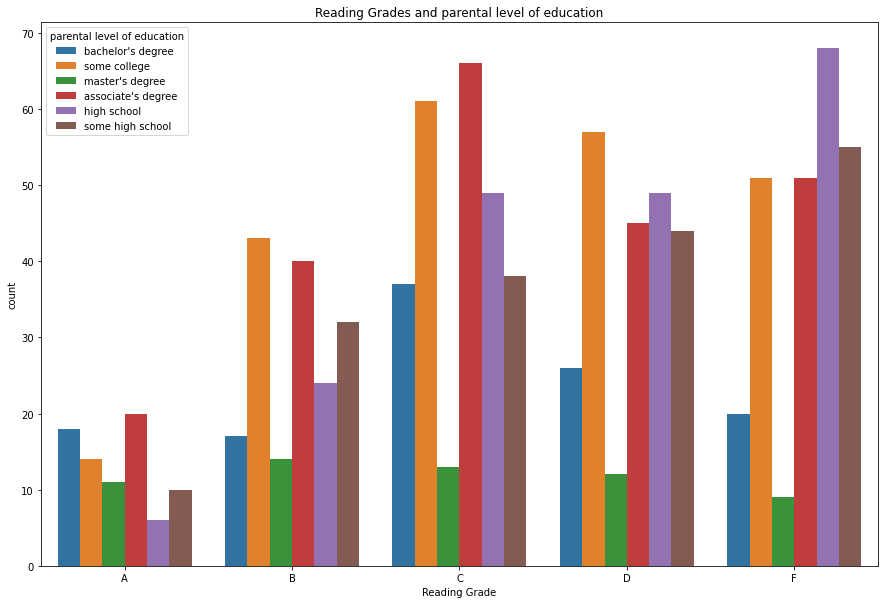

In [172]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Reading Grade"], hue=data['parental level of education'], order=['A','B','C','D','F'])
ax.set_title('Reading Grades and parental level of education')

In the case of reading grades hued by the parent level of education, levels of high school and some high school are negatively skewed. For associate's and some college, the distribution is negatively skewed but appears more normal than high school and some high school. For levels of master's degree and bachelor's degree, the distributions appear normal. Thus, the mean reading grade for master's and bachelor's is higher than in other groups.

Text(0.5, 1.0, 'Writing Grades and parental level of education')

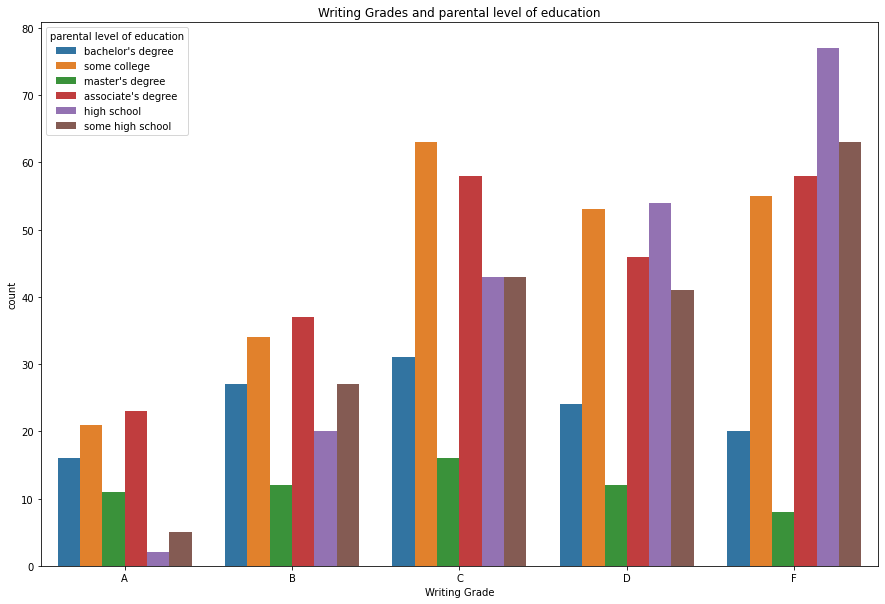

In [173]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Writing Grade"], hue=data['parental level of education'], order=['A','B','C','D','F'])
ax.set_title('Writing Grades and parental level of education')

Similar to the reading grades, in the case of writing grades hued by the parent level of education, levels of high school and some high school are negatively skewed. For associate's and some college, the distribution is negatively skewed but appears more normal than high school and some high school. For levels of master's degree and bachelor's degree, the distributions appear normal. Thus, the mean writing grade for master's and bachelor's is higher than in other groups.

### Lunch vs Test Scores

Text(0.5, 1.0, 'Math Grades and Lunch')

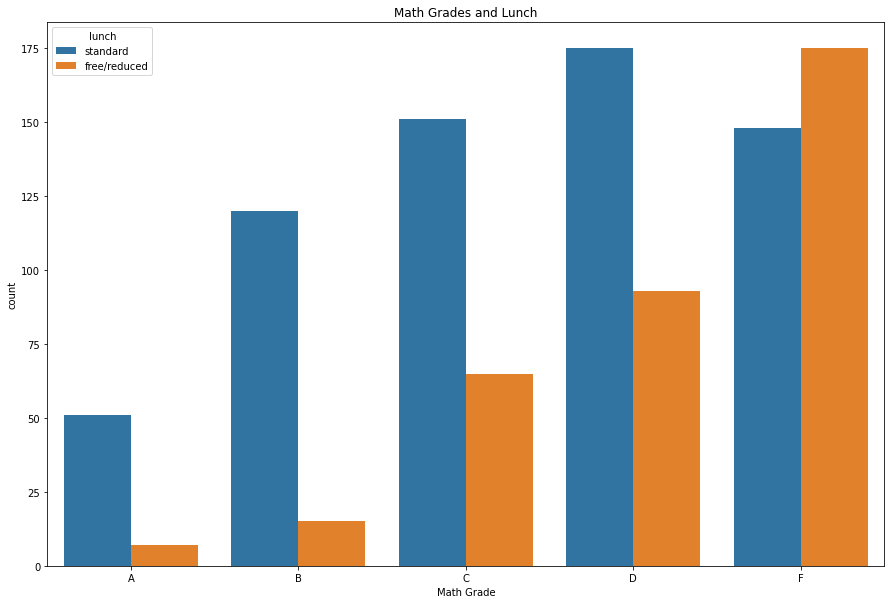

In [174]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Math Grade"], hue=data['lunch'], order=['A','B','C','D','F'])
ax.set_title('Math Grades and Lunch')

In the case of Math grades hued by lunch type, both standard and free/reduced are negatively skewed. The skew of free/reduced is more extreme.

Text(0.5, 1.0, 'Reading Grades and Lunch')

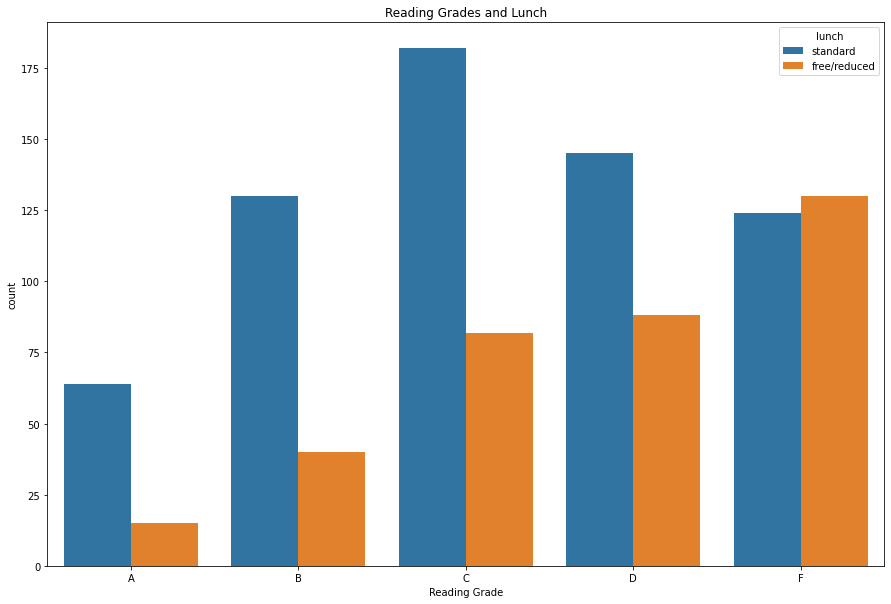

In [181]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Reading Grade"], hue=data['lunch'], order=['A','B','C','D','F'])
ax.set_title('Reading Grades and Lunch')

In the case of reading grades hued by lunch type, free/reduced is negatively skewed. Standard lunch appears somewhat normal. Thus, the mean reading grade of standard is higher than free/reduced.

Text(0.5, 1.0, 'Writing Grades and Lunch')

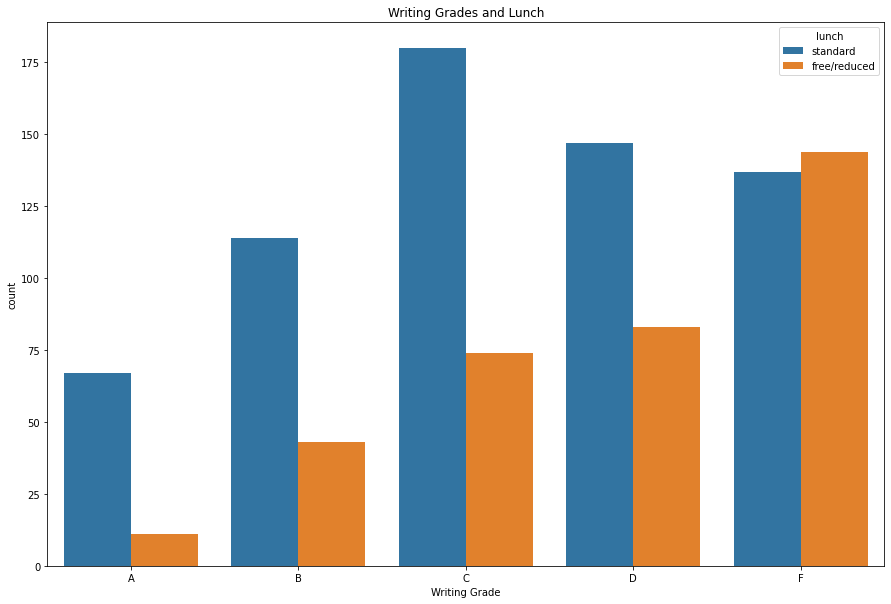

In [176]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Writing Grade"], hue=data['lunch'], order=['A','B','C','D','F'])
ax.set_title('Writing Grades and Lunch')

Similar to reading grades, in the case of writing grades hued by lunch type, free/reduced is negatively skewed. Standard lunch appears somewhat normal. Thus, the mean writing grade of standard is higher than free/reduced.

### Test Preparation Course vs Test Scores

Text(0.5, 1.0, 'Math Grades and Test preparation course')

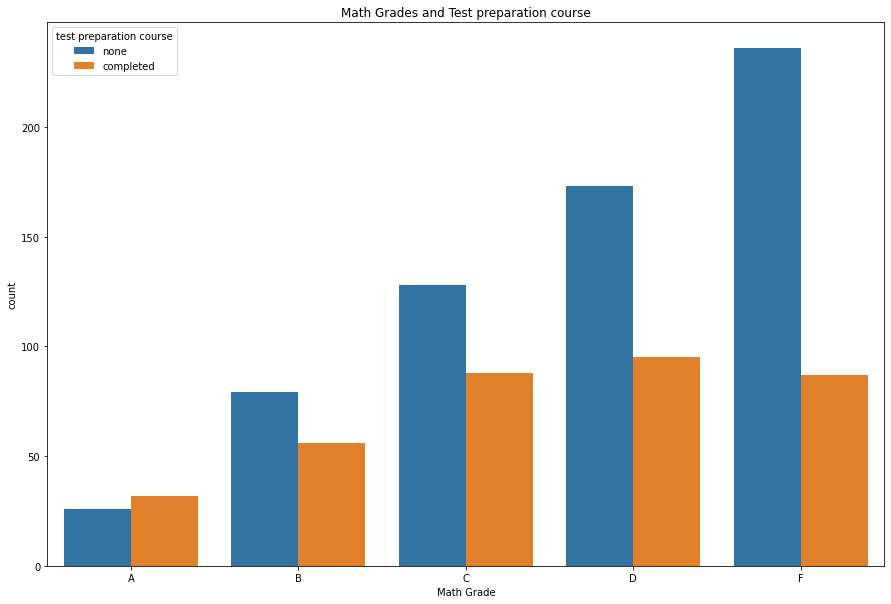

In [177]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Math Grade"], hue=data['test preparation course'], order=['A','B','C','D','F'])
ax.set_title('Math Grades and Test preparation course')

In the case of Math grades hued by test preparation course, both groups of none and complement appear to be negatively skewed. The skew of the none group is more extreme.

Text(0.5, 1.0, 'Reading Grades and Test preparation course')

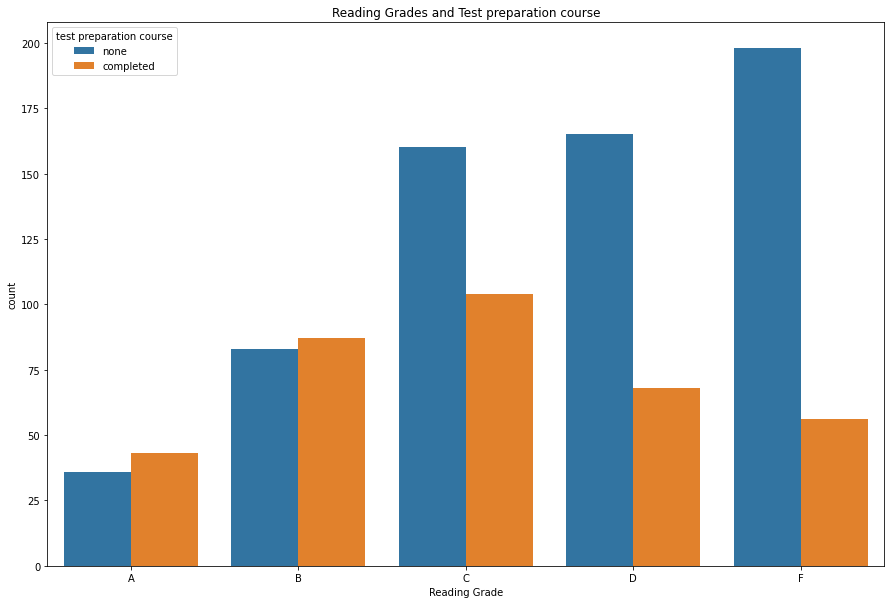

In [178]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Reading Grade"], hue=data['test preparation course'], order=['A','B','C','D','F'])
ax.set_title('Reading Grades and Test preparation course')

In the case of reading grades hued by test preparation course, the none group is negatively skewed. The completed group appears normal. Thus, the mean grade of reading for students who completed a preparation course is higher than those who don't.

Text(0.5, 1.0, 'Writing Grades and Test preparation course')

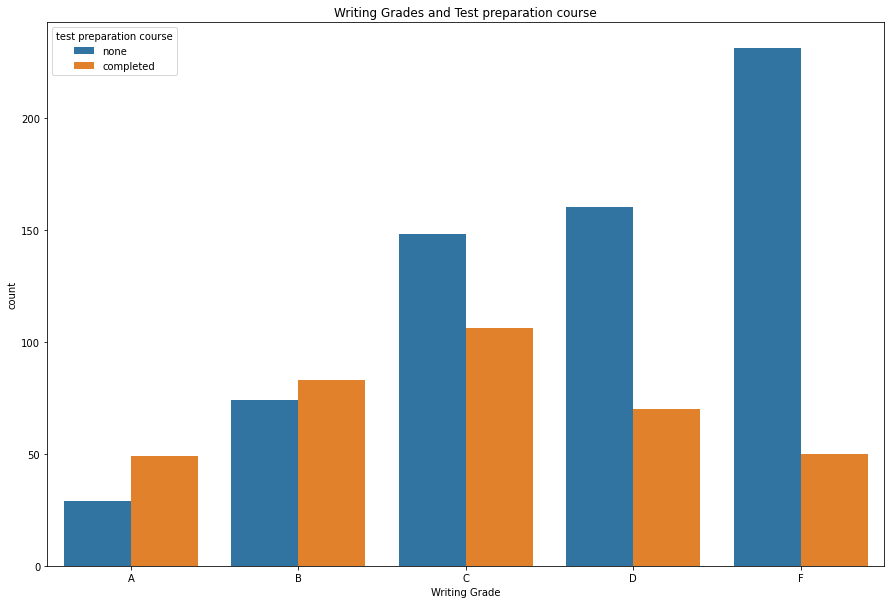

In [182]:
dim=(15,10)
fig, ax=plt.subplots(figsize=dim)
ax = sns.countplot(data["Writing Grade"], hue=data['test preparation course'],order=['A','B','C','D','F'])
ax.set_title('Writing Grades and Test preparation course')

Similar to reading grades, in the case of writing grades hued by test preparation course, the none group is negatively skewed. The completed group appears normal. Thus, the mean of writing grades for students who completed a preparation course is higher than those who don't.

## Section 5: Formulating Hypotheses

### Hypothesis 1:

* Null Hypothsis: Males and Females differ in performance on math tests
* Alternative Hypothesis: There is no difference in performance
* alpha = 0.05

### Hypothesis 2:

* Null Hypothesis: Students that did not complete a preparation course and students who did differ in performance on math tests
* Alternative Hypothesis: There is no difference in performance
* alpha = 0.05

### Hypothesis 3:

* Null Hypothesis: Students with standard lunch and students with free/reduced lunch differ in performance
* Alternative Hypothesis: There is no difference in performance
* alpha = 0.05

## Section 6: Conducting Test for Significance

### Hypothesis 1:

In [211]:
male=data[data['gender']=='male']
female=data[data['gender']=='female']

In [210]:
import numpy as np
from scipy import stats
np.random.seed(12)
sample_male=np.random.choice(male['math score'], size=100)
sample_female=np.random.choice(female['math score'], size=100)
stats.ttest_ind(sample_male,sample_female, equal_var=False)

Ttest_indResult(statistic=3.787604918380427, pvalue=0.00020398980693459655)

alpha>p-value; Testing the difference of performance between males and females in math at 5% significance, we reject the null hypothesis; males and females perform significantly different on math tests.

### Hypothesis 2:

In [213]:
completed=data[data['test preparation course']=='completed']
none=data[data['test preparation course']=='none']

In [221]:
np.random.seed(100)
sample_completed=np.random.choice(completed['math score'],size=100)
sample_none=np.random.choice(none['math score'],size=100)
stats.ttest_ind(sample_completed, sample_none, equal_var=False)

Ttest_indResult(statistic=2.7138174802757202, pvalue=0.007237933982593933)

alpha>p-value; Testing the difference of performance between students who completed a preparation class and students who did not, testing at 5% significance, we reject the null hypothesis. Students who completed a course and student who did not differ significantly in performance on math tests.

### Hypothesis 3:

In [225]:
standard=data[data['lunch']=='standard']
none=data[data['lunch']=='free/reduced']

In [226]:
np.random.seed(150)
sample_standard=np.random.choice(standard['math score'],size=100)
sample_none=np.random.choice(none['math score'],size=100)
stats.ttest_ind(sample_standard,sample_none,equal_var=False)

Ttest_indResult(statistic=5.475441703975005, pvalue=1.333670364723057e-07)

alpha>p-value; Testing the difference of performance between students with standard lunch and free/reduced lunch, testing at 5% significance, we reject the null hypothesis. Students with standard and free/reduced lunch differ significantly in performance on math tests.

## Section 7: Future Analysis

The future analysis of this data would include the creation of a prediction model using linear regression(predict test scores) or logistic regression(predict the probability of students scoring in a certain interval of test scores). The data would require encoding of the categorical features.

## Section 8: Summary

In conclusion, throughout this analysis of data of student performance on tests and their student attributes, we have uncovered some key findings within the data. Firstly, in the comparison of letter grade frequency hued by gender, females showed a higher mean grade letter than males in reading and writing. In math, they roughly had the same distribution. Secondly, in the comparison of the frequency of letter grades hued by race/ethnicity, Group E, for all 3 three tests, displayed higher means in Letter Grades than all other groups. However, we must consider the significant difference in population size within the race/ethnicity column. Thirdly, in the comparison of letter grade and parental level of education, students whose parents have a master's or bachelor's have higher averages in reading and writing. The distribution of math was roughly the same as the others. Fourthly, in the comparison of a letter grade and type of lunch, students with standard lunch have higher letter grade means for reading and writing tests. Fifthly, in the comparison of a letter grade and whether a student completed a preparation course or not, students that completed the course have higher letter grade means in writing and reading. Lastly, for my inferential testing, since I noticed students across all the features consistently had the same negatively skewed distribution, I proposed my testing to see if there was a significant difference in math test performance for the features of gender, test preparation course, and lunch type. I concluded for all three tests that there is a significant difference in performance. For future analysis, I would request data on student GPA, tardiness, hours studied, and extracurriculars.